# Team Name: Data Scouts
### Team Members:
 
 -  Sai Harika Paluri                                                          
 -  Nikhil Kumar Mutyala                                              
 -  Sree Divya Keerthi Paravasthu Siddanthi                                     
 -  Ravi Theja Goalla   
 
 
#  Project Title: Price prediction in ride-hailing services based on weather conditions

## Project Description:
Uber and Lyft's ride prices are not constant like public transport. They are greatly affected by the demand and supply of rides at a given time. So what exactly drives this demand? The first guess would be the time of the day; times around 9 am and 5 pm should see the highest surges on account of people commuting to work/home. Another guess would be the weather; rain/snow should cause more people to take rides.

The data is approx. for a week of Nov '18 ( I actually have included data collected while I was testing the 'querying' application so might have data spread out over more than a week. I didn't consider this as a time-series problem so did not worry about regular interval. The chosen interval was to query as much as data possible without unnecessary redundancy. So data can go from end week of Nov to few in Dec)
The Cab ride data covers various types of cabs for Uber & Lyft and their price for the given location. You can also find if there was any surge in the price during that time. Weather data contains weather attributes like temperature, rain, cloud, etc for all the locations taken into consideration.

#  DATA

## Source of Data

We have acquired this dataset from  kaggle https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices.

## Description of Data

The dataset contains 10 features along with the price for 693071 observations. Later we add few more derived features to this dataset.<br>The date is in timestamp format. So we change that timestamp into date format, the date attribute is added to the dataset and timestamp attribute is removed. Few attributes are added like hour, fare_per_mile. The description for the 10 features is given below:<br>

 <style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
        }
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>
  <table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    </tr>
  <tr>
    <td>Distance</td>
    <td>Distance between source and destination of the cab ride</td>
    </tr>
  <tr>
    <td>cab_type</td>
    <td>The type of uber car or lyft booked.</td>
    </tr>
  <tr>
    <td>time_stamp</td>
    <td>Measured timestamp</td>
    </tr>
  <tr>
    <td>destination</td>
    <td>The destination of the cab ride</td>
    </tr>
  <tr>
    <td>source</td>
    <td>The source of a cab ride</td>
    </tr>
  <tr>
    <td>price</td>
    <td>Total estimated price of the cab ride.</td>
    </tr><tr>
    <td>name</td>
    <td>Name of the Uber/Lyft product</td>
    </tr>
    <tr>
    <td>Surge_multiplier</td>
    <td>This is the factor by which a normal cab fare is multiplied.If it is 1 it means that there is no surge.</td>
    </tr>
    <tr>
    <td>id</td>
    <td>Unique id per ride</td>
    </tr>
    <tr>
    <td>product_id</td>
    <td>Unique id of a particular product of Lyft or Uber. </td>
    </tr>
</table>

The other dataset we are merging with cabs_rides is weather_data.We have 8 features and 6276 entries in this.We use time_stamp feature to merge with the cab_rides data. 

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
        }
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>
  <table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    </tr>
  <tr>
    <td>temp</td>
    <td>Average temperature for a particular day</td>
    </tr>
  <tr>
    <td>location</td>
    <td>Aread in boston where the temperature was recorded.</td>
    </tr>
  <tr>
    <td>clouds</td>
    <td>Measured timestamp</td>
    </tr>
  <tr>
    <td>pressure</td>
    <td>The destination of the cab ride</td>
    </tr>
  <tr>
    <td>rain</td>
    <td>Amount of precipitation</td>
    </tr>
  <tr>
    <td>time_stamp</td>
    <td>Measured timestamp in a day</td>
    </tr>
    <tr>
    <td>Humidity</td>
    <td>Humidity percentage in the climate.</td>
    </tr>
    <tr>
    <td>Wind</td>
    <td>Wind speed recorded for a particular day</td>
    </tr>
    </table>



# CRISM-DM PROCESS

## Importing the dataset

In [1]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import preprocessing
import datetime
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


In [2]:
#Importing our dataset
df_cab=pd.read_csv('cab_rides.csv')
#Creating an index label for the dataset
df_cab.reset_index(drop=True, inplace=True)

 We need to identify the charecteristics of our dataset .For this we use three methods:-             
 info()-Used for identifying the different features and data types in a dataset.<br>
 shape()-We used this method to get an idea of  the rows and columns in a dataframe.<br>
 head()-We  used this method to examine the first few rows of the dataset<br>
 describe()-We used this method to identify the summary statistic's of all the features of the dataset.

In [3]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [4]:
df_cab.shape

(693071, 10)

In [5]:
df_cab = df_cab.iloc[0:10000, :]
df_cab.shape

(10000, 10)

In [6]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux


In [7]:
df_cab.describe()

,distance,time_stamp,price,surge_multiplier
count,10000.00000,1.000000e+04,9227.000000,10000.000000
mean,2.13824,1.544030e+12,16.324753,1.012875
std,1.12805,6.854128e+08,9.137386,0.089114
min,0.30000,1.543207e+12,2.500000,1.000000
25%,1.25000,1.543439e+12,9.000000,1.000000
50%,2.05000,1.543727e+12,13.500000,1.000000
75%,2.86000,1.544811e+12,22.500000,1.000000
max,7.46000,1.545161e+12,67.500000,2.500000


# DATA CLEANING  AND PREPROCCESSING

For data cleaning these were the steps that we followed:-<br>
1.We identified the null values in our dataset.<br>
2.We identified the count's of different features.<br>
3.We performed imputation of the null  price column using fare per pile.

In [8]:
df_cab.isnull().sum()

distance              0
cab_type              0
time_stamp            0
destination           0
source                0
price               773
surge_multiplier      0
id                    0
product_id            0
name                  0
dtype: int64

In [9]:
df_cab['cab_type'].value_counts()

Uber    5427
Lyft    4573
Name: cab_type, dtype: int64

In [10]:
df_cab['destination'].value_counts()

Northeastern University    971
North End                  958
Fenway                     889
North Station              849
Beacon Hill                837
West End                   824
Boston University          803
Back Bay                   790
Haymarket Square           788
South Station              786
Theatre District           763
Financial District         742
Name: destination, dtype: int64

In [11]:
df_cab['source'].value_counts()

North Station              954
Theatre District           920
Back Bay                   905
North End                  865
Fenway                     855
Financial District         844
Haymarket Square           842
West End                   807
South Station              797
Beacon Hill                765
Northeastern University    750
Boston University          696
Name: source, dtype: int64

In [12]:
df_cab['surge_multiplier'].value_counts()

1.00    9722
1.25     150
1.50      58
1.75      35
2.00      33
2.50       2
Name: surge_multiplier, dtype: int64

In [13]:
df_cab['name'].value_counts()

Black           781
UberPool        778
Black SUV       776
UberXL          775
UberX           774
Taxi            773
WAV             770
Shared          769
Lux Black XL    766
Lyft XL         762
Lux             762
Lux Black       757
Lyft            757
Name: name, dtype: int64

We noticed that the time_stamp  attribute is not in a proper format so we converted it into a proper format.We also introduced a new attribute called fare_per_mile .This value was obtained by dividing the cab price and distance covered per ride.

In [14]:
import datetime
#convert 13digit time stamp to datetime format
df_cab['date_time']= pd.to_datetime(df_cab['time_stamp']/1000, unit='s')
df_cab['date']= df_cab['date_time'].dt.date
df_cab['day'] = df_cab.date_time.dt.dayofweek
df_cab['hour'] = df_cab.date_time.dt.hour
#extract hours only
df_cab['fare_per_mile']= round(df_cab.price/df_cab.distance,2)

In [15]:
#To check if cab data has changed.
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,date,day,hour,fare_per_mile
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,6,9,11.36
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,2018-11-27,1,2,25.00


In [16]:
#After conversion to a new column time we can delete the exisitng column
del df_cab['time_stamp']

We are using an imputation technique to replace the missing price values.We noticed that the missing values in the dataset are that of the type Uber-Taxi.The rate per mile in Boston for an UBER of the type 'TAXI'is a constant.The rate doesnt change irespective of the surge or weather conditions.Hence by multiplying the fare per mile and distance traveled in an Uber taxi,we were able to obtain the missing price.

In [18]:
#Replacing null values.
df_cab['fare_per_mile']=df_cab['fare_per_mile'].astype(float)
df_cab['fare_per_mile'].fillna('2.8',inplace=True)
df_cab['price'] = df_cab['fare_per_mile']*df_cab['distance']

In [19]:
#After replacement checking if the change is reflected in the dataset.
df_cab.price.isnull().sum()

0

# Visualizations for Data Preprocessing

Visualizations help us understand the dsitribution of the  data better.For this purpose we explored several graphs ranging from heatmaps to count plots and bar plots.

In [20]:
#Mentioning our graph sizes
from pylab import rcParams
rcParams['figure.figsize'] = 16,10

Text(0.5, 1, 'DATA SUMMARY')

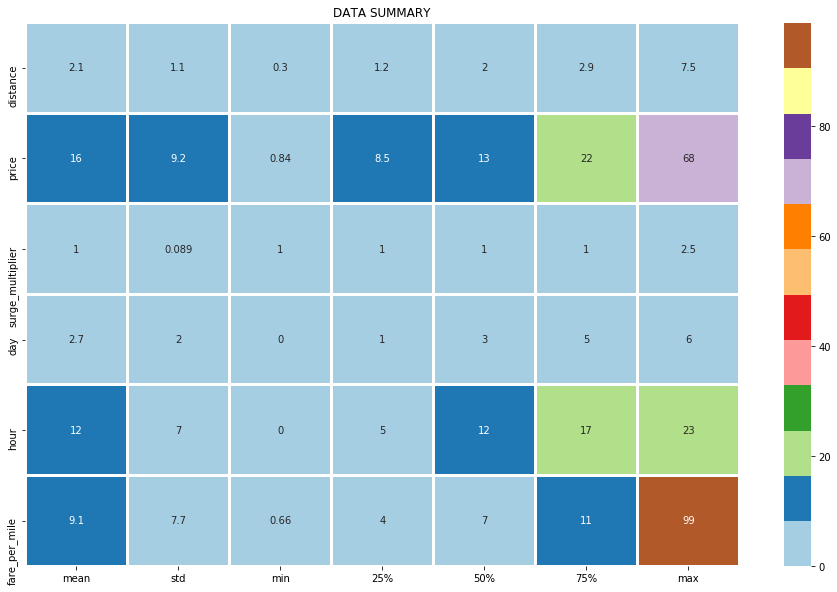

In [21]:
sns.heatmap(df_cab.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")

Text(0.5, 1, 'CORRELATION BETWEEN VARIABLES')

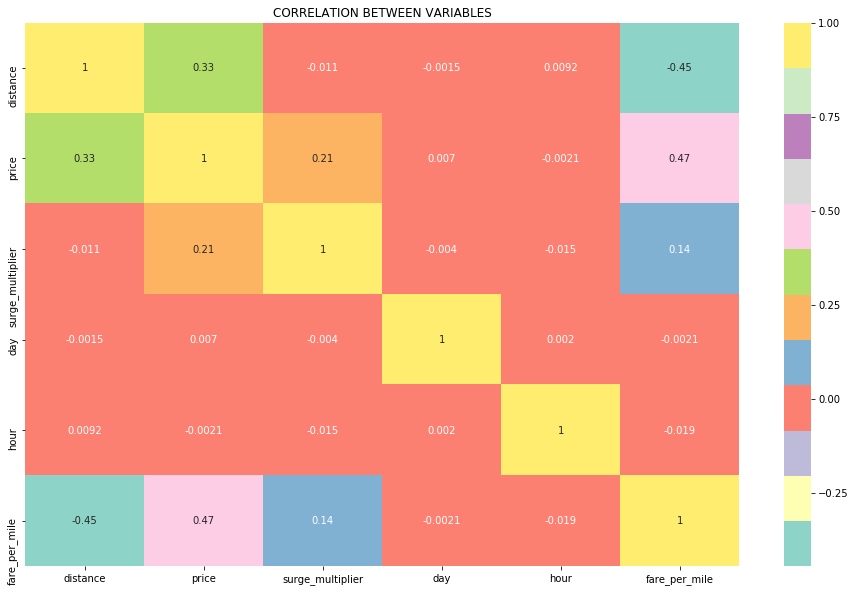

In [22]:
#Heatmap from searborn library
df_corr = df_cab.corr()
sns.heatmap(df_corr, cmap =sns.color_palette("Set3"),annot = True)
plt.title("CORRELATION BETWEEN VARIABLES")

This heatmap gave us an idea of the highly correlated variables.We observe that apart from the variable fare_per_mile .Distance and price have postive correlation whereas surge_multiper has positive correlation with price and negatve correlation with distance.

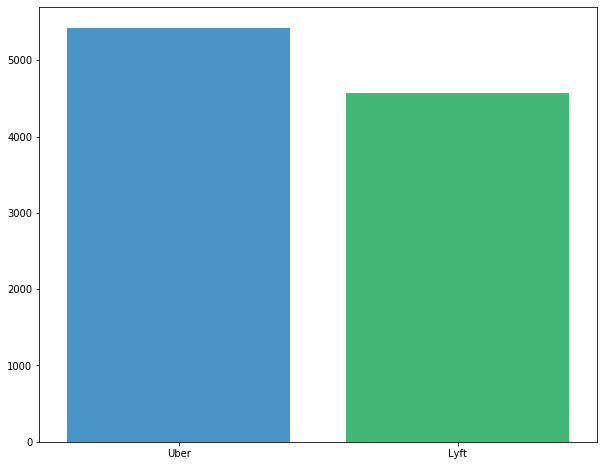

In [23]:
#Barplot  to display Uber Vs Lyft 

plt.figure(figsize=(10,8))
flatui = [ "#3498db", "#2ecc71"]
x=['Uber','Lyft']
y = [df_cab.cab_type[(df_cab.cab_type)=='Uber'].count(),df_cab.cab_type[(df_cab.cab_type)=='Lyft'].count()]
vis1= sns.barplot(x,y,palette=flatui)

# Data preparation for Data preprocessing

We wanted to answer certain questions such as How does weather effect the surge? Does  it solely depend on weather only? and 
How each weather attribute effects surge?.This is when we realised that to answer these questions we need to merge our existing cab_rides dataset with weather data for each day in Boston.We used the time_stamp attribute as the common attribute between the two datasets.<br>
<b>NOTE:- </b><I>We use date to join both our data sets.As weather is recorded for an average day.</I>

In [24]:
#Import the new dataset and view the attributes
df_weather=pd.read_csv('weather.csv')
df_weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32


In [25]:
df_weather['rain'].fillna(0, inplace = True)

In [26]:
#Splitting the time_stamp attribute in weather to two attributes which are time and data
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')
del df_weather['time_stamp']

#df_weather['date_time']

In [27]:
#merge the datasets to refelect same time for a location
df_cab['merge_date'] = df_cab.source.astype(str) +" - "+ df_cab.date_time.dt.date.astype("str") +" - "+ df_cab.date_time.dt.hour.astype("str")
df_weather['merge_date'] = df_weather.location.astype(str) +" - "+ df_weather.date_time.dt.date.astype("str") +" - "+ df_weather.date_time.dt.hour.astype("str")
print(df_cab.head(2))
print(df_weather.head(2))

   distance cab_type    destination            source    price  \
0      0.44     Lyft  North Station  Haymarket Square   4.9984   
1      0.44     Lyft  North Station  Haymarket Square  11.0000   

   surge_multiplier                                    id    product_id  \
0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line   
1               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier   

     name                     date_time        date  day  hour  fare_per_mile  \
0  Shared 2018-12-16 09:30:07.890000105  2018-12-16    6     9          11.36   
1     Lux 2018-11-27 02:00:23.677000046  2018-11-27    1     2          25.00   

                          merge_date  
0  Haymarket Square - 2018-12-16 - 9  
1  Haymarket Square - 2018-11-27 - 2  
    temp     location  clouds  pressure    rain  humidity   wind  \
0  42.42     Back Bay     1.0   1012.14  0.1228      0.77  11.25   
1  42.43  Beacon Hill     1.0   1012.15  0.1846      0.76  11.32   

         

In [28]:
df_weather = df_weather.groupby(['merge_date']).mean()
df_weather.reset_index(inplace=True)
df_weather.head()

,merge_date,temp,clouds,pressure,rain,humidity,wind
0,Back Bay - 2018-11-26 - 10,40.695,0.995,1014.800,0.0000,0.940,1.895
1,Back Bay - 2018-11-26 - 11,40.185,0.955,1015.305,0.0000,0.940,2.260
2,Back Bay - 2018-11-26 - 12,40.315,0.920,1015.275,0.0000,0.935,2.940
3,Back Bay - 2018-11-26 - 13,41.950,0.910,1015.200,0.0031,0.910,3.545
4,Back Bay - 2018-11-26 - 14,42.765,0.905,1014.695,0.0044,0.910,2.960


In [29]:
#Merging based on the date and location.
df_merged = pd.merge(df_cab, df_weather, on='merge_date')
print(df_merged.shape)

(9951, 21)


In our newly formed merged dataset we perform info(),describe() and shape(),columns to understand the data.

In [30]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9951 entries, 0 to 9950
Data columns (total 21 columns):
distance            9951 non-null float64
cab_type            9951 non-null object
destination         9951 non-null object
source              9951 non-null object
price               9951 non-null float64
surge_multiplier    9951 non-null float64
id                  9951 non-null object
product_id          9951 non-null object
name                9951 non-null object
date_time           9951 non-null datetime64[ns]
date                9951 non-null object
day                 9951 non-null int64
hour                9951 non-null int64
fare_per_mile       9951 non-null float64
merge_date          9951 non-null object
temp                9951 non-null float64
clouds              9951 non-null float64
pressure            9951 non-null float64
rain                9951 non-null float64
humidity            9951 non-null float64
wind                9951 non-null float64
dtypes: datetime

In [31]:
df_merged.shape

(9951, 21)

In [32]:
print(df_merged.columns)

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time', 'date',
       'day', 'hour', 'fare_per_mile', 'merge_date', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


## Visualization of merged dataset

We have several new attributes in our merged dataset .We want visualize how these attributes contribute to our existing features such as surge,price,location cab_type and weather attributes such as rain.For visualization we have employed several plots which are catplots,countplots,boxplots,distplot and violionplot. 

Text(0.5, 1, 'DATA SUMMARY')

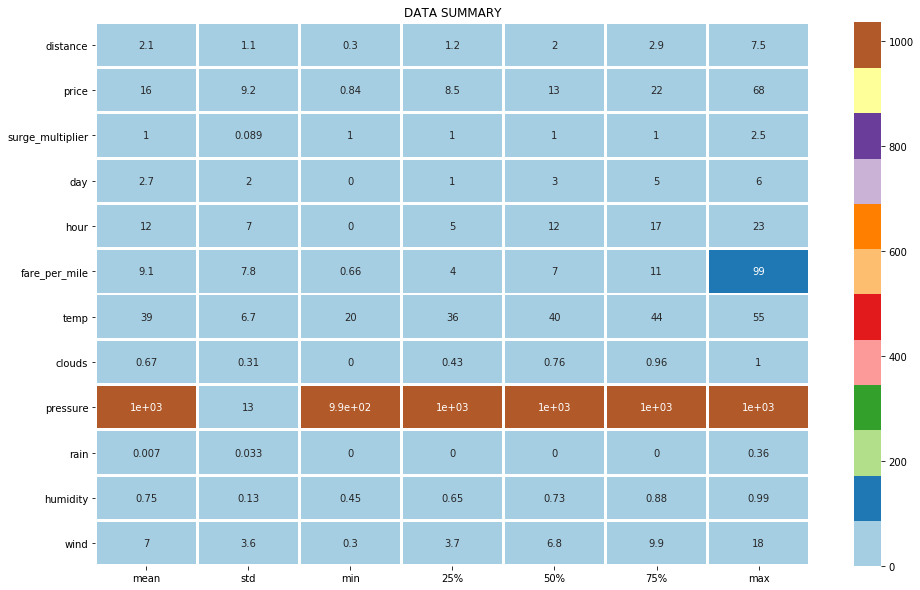

In [33]:
sns.heatmap(df_merged.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")

Text(0.5, 1, 'CORRELATION BETWEEN VARIABLES')

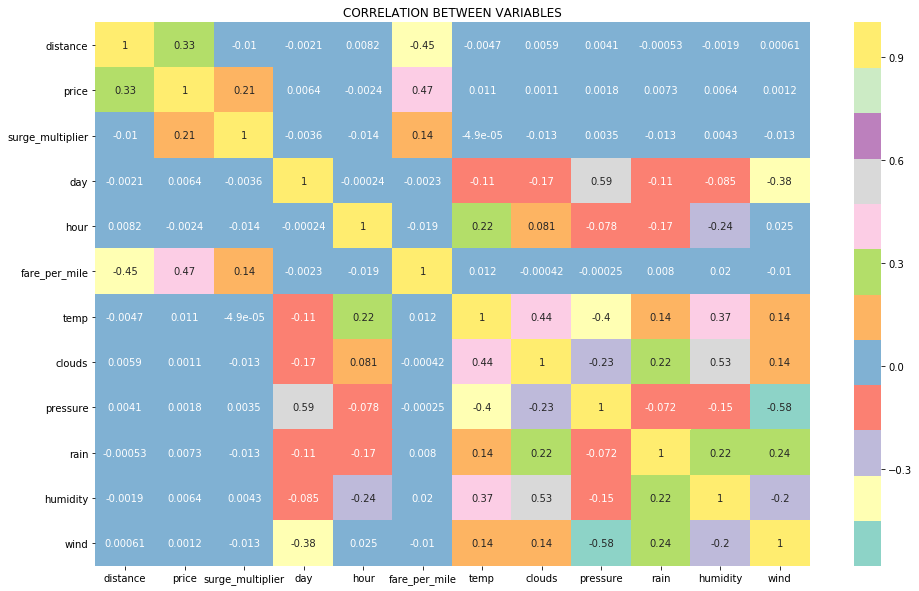

In [34]:
df_corr = df_merged.corr()
sns.heatmap(df_corr, cmap =sns.color_palette("Set3"),annot = True)
plt.title("CORRELATION BETWEEN VARIABLES")

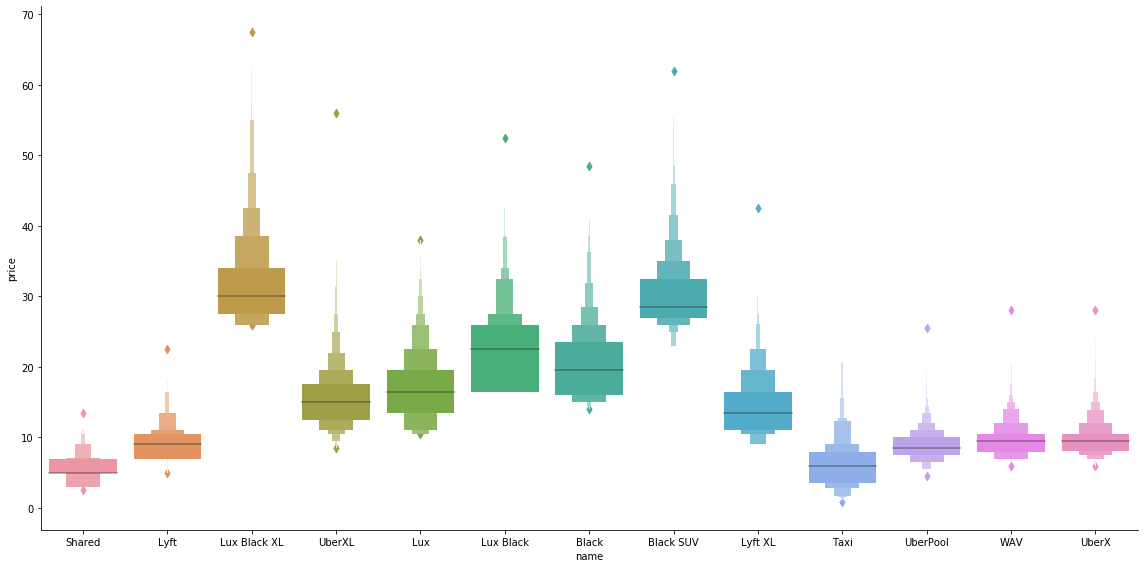

In [35]:
#Catplot
sns.catplot(x="name", y="price", data=df_merged,kind="boxen", height=8, aspect=2);

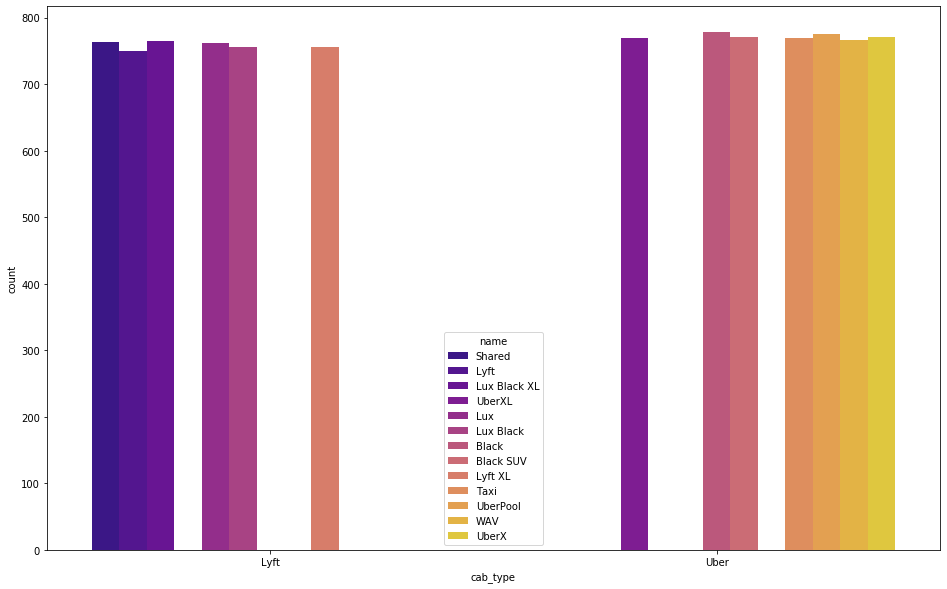

In [36]:
#Countplot
sns.countplot(df_merged['cab_type'],hue=df_merged['name'], palette='plasma')

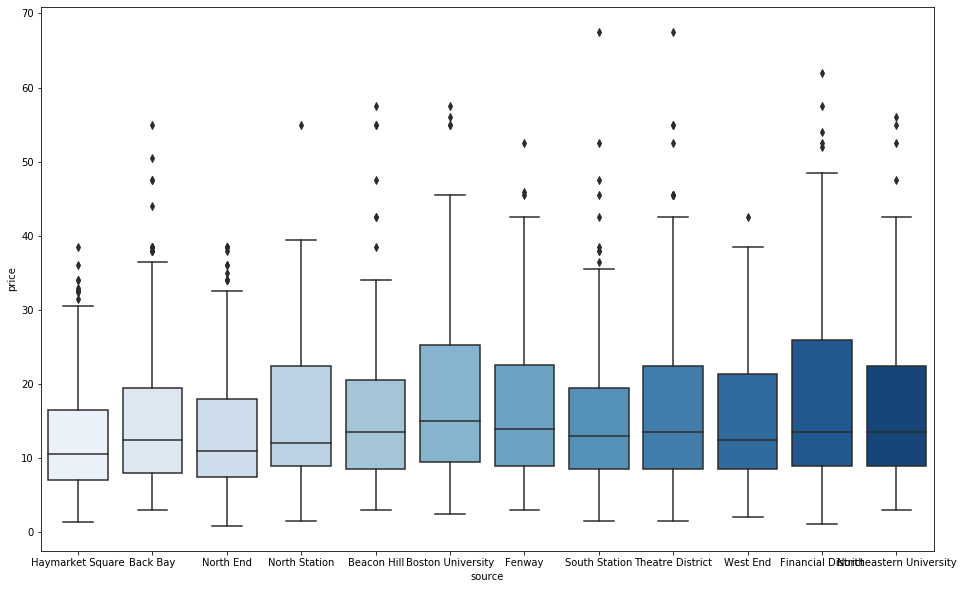

In [37]:
sns.boxplot(data=df_merged, x='source',y='price',palette='Blues')

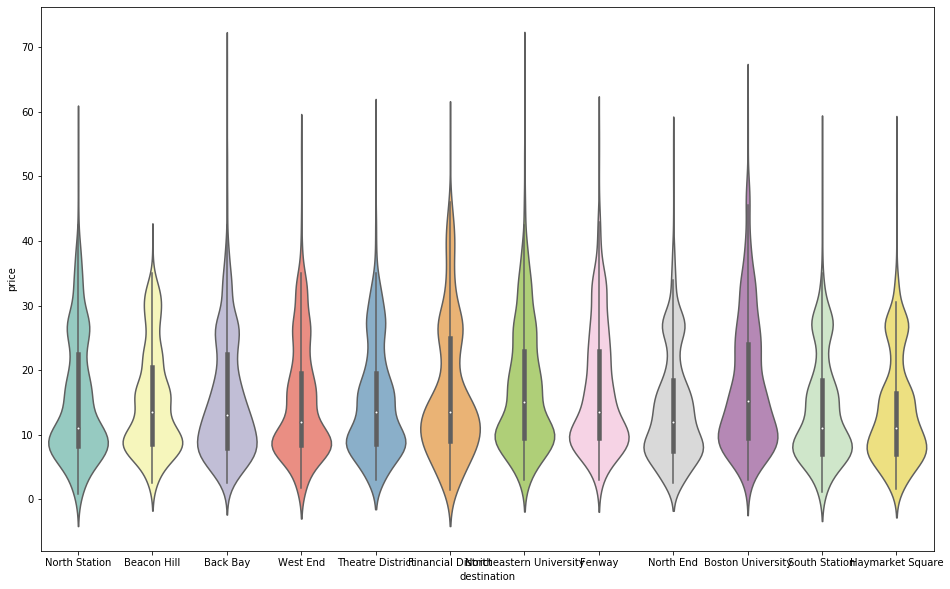

In [38]:
sns.violinplot(data=df_merged, x='destination', y='price',palette="Set3",scale="width")

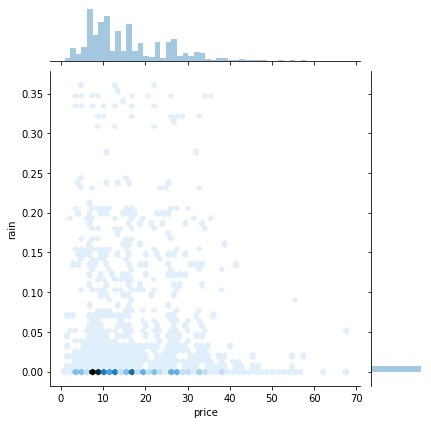

In [39]:
#Jointplot
sns.jointplot("price", "rain", data=df_merged, kind="hex",bins=15)

name
Black           AxesSubplot(0.125,0.125;0.775x0.755)
Black SUV       AxesSubplot(0.125,0.125;0.775x0.755)
Lux             AxesSubplot(0.125,0.125;0.775x0.755)
Lux Black       AxesSubplot(0.125,0.125;0.775x0.755)
Lux Black XL    AxesSubplot(0.125,0.125;0.775x0.755)
Lyft            AxesSubplot(0.125,0.125;0.775x0.755)
Lyft XL         AxesSubplot(0.125,0.125;0.775x0.755)
Shared          AxesSubplot(0.125,0.125;0.775x0.755)
Taxi            AxesSubplot(0.125,0.125;0.775x0.755)
UberPool        AxesSubplot(0.125,0.125;0.775x0.755)
UberX           AxesSubplot(0.125,0.125;0.775x0.755)
UberXL          AxesSubplot(0.125,0.125;0.775x0.755)
WAV             AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

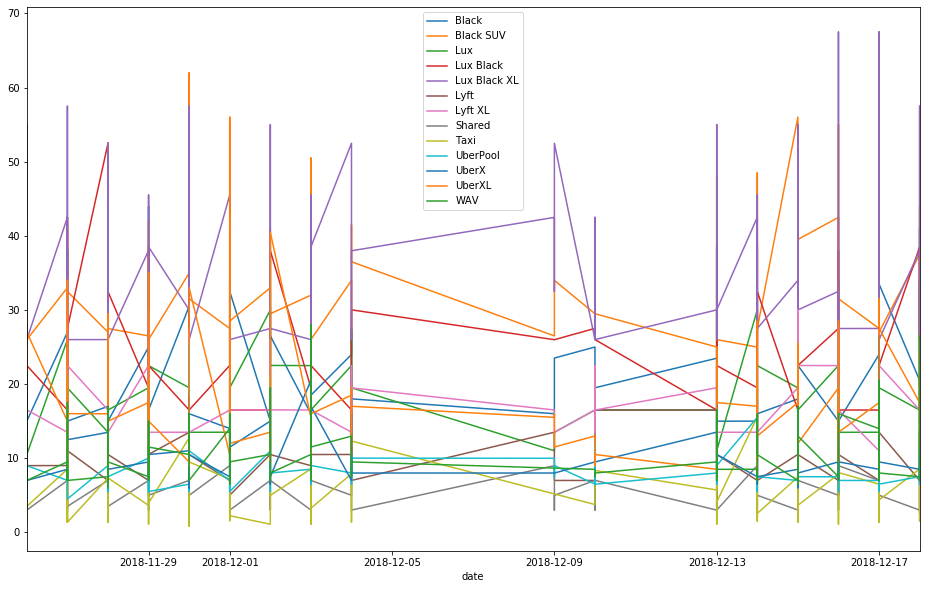

In [40]:
df_merged.set_index('date').groupby('name')['price'].plot(legend=True)

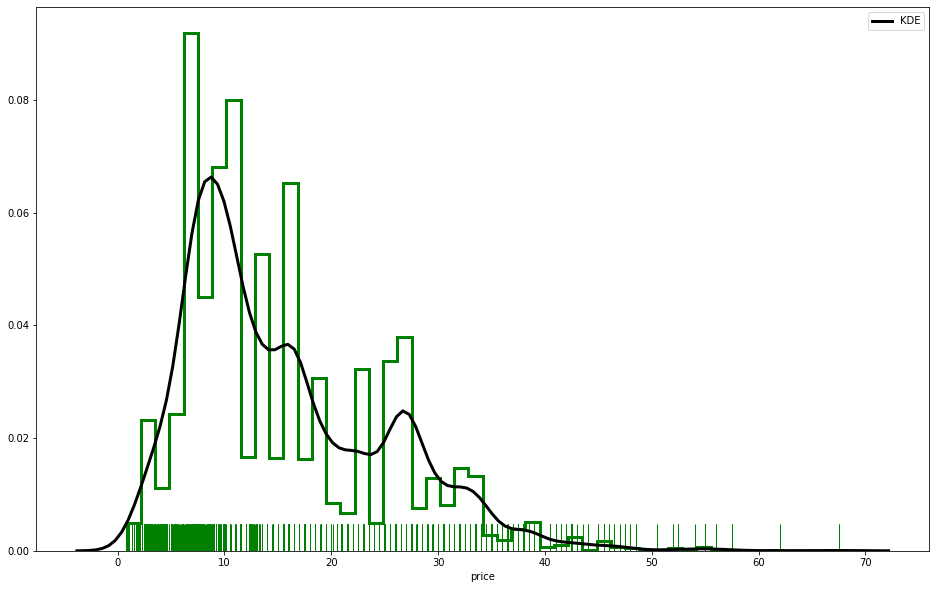

In [41]:
sns.distplot(df_merged.price, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

## Splitting into uber and lyft

In [42]:
df_merged = df_merged.drop(['date_time','id','product_id'], axis=1)
f_merged = df_merged.drop(['fare_per_mile','surge_multiplier'],axis=1)
df_merged = df_merged.loc[:, df_merged.columns !='merge_date']

In [43]:
OverallData = df_merged.drop(['cab_type'],axis=1)
uber = df_merged[df_merged['cab_type']=='Uber']
uber.reset_index(inplace=True)
uber.drop('index', axis=1, inplace=True)
lyft = df_merged[df_merged['cab_type']=='Lyft']
lyft.reset_index(inplace=True)
lyft.drop('index', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
uber.drop('cab_type', axis=1, inplace=True)
lyft.drop('cab_type', axis=1, inplace=True)

In [45]:
#Data =OverallData.loc[:, OverallData.columns != 'merge_date'] 
print(OverallData.columns)
print(uber.columns)
print(lyft.columns)

Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')
Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')
Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


In [46]:
Xd = OverallData.loc[:, OverallData.columns != 'price']
#Xd = pd.get_dummies(Xd)
yd = OverallData['price']
Xd_train,Xd_test,yd_train,yd_test = train_test_split(Xd,yd,test_size = 0.33, random_state=42)

In [47]:
Xu = uber.loc[:, uber.columns != 'price']
#Xu = pd.get_dummies(Xu)
yu = uber['price']
Xu_train,Xu_test,yu_train,yu_test = train_test_split(Xu,yu,test_size = 0.33, random_state=42)

In [48]:
Xl = lyft.loc[:, lyft.columns != 'price']
yl = lyft['price']
Xl_train,Xl_test,yl_train,yl_test = train_test_split(Xl,yl,test_size = 0.33, random_state=42)

In [49]:
numerical_features = Xu.dtypes == 'float'
categorical_features = ~numerical_features
preprocess = make_column_transformer(
(numerical_features, StandardScaler()),
(categorical_features, OneHotEncoder()))
rt = RandomForestRegressor(n_estimators=200,random_state = 42)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [50]:
#Modelling for uber
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics

pipe = make_pipeline(preprocess, rt)
pipe.fit(Xu_train, yu_train)
yu_pred = pipe.predict(Xu_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yu_test, yu_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yu_test, yu_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yu_test, yu_pred)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((yu_test - yu_pred) / yu_test)) * 100)

Mean Absolute Error: 0.31970097442788464
Mean Squared Error: 0.41901757997034245
Root Mean Squared Error: 0.6473156725820428
Mean Absolute Percentage Error: 1.8898862519507036


In [51]:
#Modelling for lyft
pipe = make_pipeline(preprocess, rt)
pipe.fit(Xl_train, yl_train)
yl_pred = pipe.predict(Xl_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yl_test, yl_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yu_test, yu_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yl_test, yl_pred)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((yl_test - yl_pred) / yl_test)) * 100)

Mean Absolute Error: 0.5355782429627045
Mean Squared Error: 0.41901757997034245
Root Mean Squared Error: 1.1474635511626745
Mean Absolute Percentage Error: 3.1452759383517868


In [52]:
#Modelling for Complete dataset
pipe = make_pipeline(preprocess, rt)
pipe.fit(Xd_train, yd_train)
yd_pred = pipe.predict(Xd_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yd_test, yd_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yd_test, yd_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yd_test, yd_pred)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((yd_test - yd_pred) / yd_test)) * 100)

Mean Absolute Error: 0.2603338456970093
Mean Squared Error: 0.5378502443003972
Root Mean Squared Error: 0.7333827406616529
Mean Absolute Percentage Error: 1.492690509230809


# Transformations in Data Preprocessing

In this specific stage we are getting our data ready inorder to apply machine learning models.We first need to split our data into train and test set so that we can apply changes to only the relevant features.Here price is the target variable and the other features excluding time are predictor variables.

In [53]:
#Importing neccessary modules from sklearn
from sklearn.model_selection import train_test_split
df_merged['rain'].fillna(0,inplace=True)
#Since price is the target variable
df_X1 = df_merged.loc[:, df_merged.columns != 'price']
df_X2 = df_X1.loc[:, df_X1.columns != 'time_x']
df_X = df_X2.loc[:, df_X2.columns != 'time_y']
df_y = df_merged[['price']]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)


### Standardization
We want to apply standardization on our variables before fitting it into a model and performing prediction.The method we chose is StandarScalar.We need to make sure that the categorical variables are encoded.We use nominal encoder method for that purpose.

In [54]:
#Performing ordinal encoding
x_norm_train = pd.get_dummies(X_train)
x_norm_test = pd.get_dummies(X_test)

In [55]:
x_norm_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 2996 to 7270
Data columns (total 67 columns):
distance                               6965 non-null float64
surge_multiplier                       6965 non-null float64
day                                    6965 non-null int64
hour                                   6965 non-null int64
fare_per_mile                          6965 non-null float64
temp                                   6965 non-null float64
clouds                                 6965 non-null float64
pressure                               6965 non-null float64
rain                                   6965 non-null float64
humidity                               6965 non-null float64
wind                                   6965 non-null float64
cab_type_Lyft                          6965 non-null uint8
cab_type_Uber                          6965 non-null uint8
destination_Back Bay                   6965 non-null uint8
destination_Beacon Hill                6965 no

In [56]:
#Performing normalization on all the variables in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_norm_train)
x_std_train = scaler.transform(x_norm_train)
x_std_test = scaler.transform(x_norm_test)

In [57]:
#Printing mean and standard deviation for observation purpose
print('Mean:',np.mean(x_std_train))
print('Standard Deviation',np.std(x_std_train))
print('Mean:',np.mean(x_std_test))
print('Standard Deviation',np.std(x_std_test))

Mean: -7.311667542659998e-17
Standard Deviation 1.0
Mean: 0.0002288497493312894
Standard Deviation 1.0009412172222745


In [58]:
#Creation of a dataframe from the normalized values in test and train.
df_x_std_train = pd.DataFrame(x_std_train, columns=x_norm_train.columns)
df_x_std_test = pd.DataFrame(x_std_test, columns=x_norm_test.columns)

### Principal Component Analysis
Principal component analysis is a tool used for dimensionality reduction.Since we have a a lot of variables it will be an aid to figure out the most important ones.It is always more useful to identify the data interms of its principal compoennets rather than a normal x-y-line.The directions where there are most variance and the directions where data is most spread out usually turn out to be the principal components.

In [59]:
#import neccessary pca librariers
from sklearn.decomposition import PCA
pca = PCA(.95)

In [60]:
#Fitting the normalized train data set to a pc model
pca.fit(df_x_std_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
#Gives us the principal components of the dataset.
pca.n_components_

50

In [62]:
#Using pca transforming our existing train and test data set
df_x_std_train = pca.transform(df_x_std_train)
df_x_std_test = pca.transform(df_x_std_test)

# Modelling
The dataset that we are using is a large data set with high dimensionality.We have decided to use 'RandomForest' modeling technique as it provides higher accuracy and has the power to handle a large data set with higher dimensionality. This is an Ensemble learning method.<br>
 - As the target variable 'Price' is a continuous valued, we are using 'RandomForest Regressor' instead of RandomForest Classifier.
 - We have decided to used 'k-fold Cross Validation' with Random Forest Regressor model for model validation (to assess the effectiveness of the model) and to mitigate overfitting in order to ensure more accurancy in the results.
 - To measure accuracy of the predictions we are using MAE and MAPE.

In [63]:
#Importing the libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf.fit(df_x_std_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [64]:
#Using price value for prediction and measuring mean absolute error/
predictions = rf.predict(df_x_std_test[0].reshape(1,-1))
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: price    10.51
dtype: float64 degrees.


In [65]:
#Measuring the accuracy of prediction
mape = 100 * (errors / y_test)
from sklearn.model_selection import cross_validate
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: price    42.24
dtype: float64 %.


# Association Rules
Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.
There are three major components of Apriori algorithm:

1) Support<br>
2) Confidence<br>
3) Lift<br>

### Support
Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item B. This can be calculated as:<br>
<br>
<font color="red"><center>Support(B) = (Transactions containing (B))/(Total Transactions)<br></center></font>

### Confidence
Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. Mathematically, it can be represented as:
<br>
<br>
<font color="red"><center>Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)<br></center></font>

### Lift
Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as:
<br>
<br>
<font color="red"><center>Lift(A→B) = (Confidence (A→B))/(Support (B))<br></center></font>


## Uber Data

In [66]:
uber_a=uber.copy()
print(uber_a['price'].max())
print(uber_a['price'].min())
print(uber_a['distance'].max())
print(uber_a['distance'].min())

61.98240000000001
0.84
7.46
0.3


In [67]:
price_bins = [0,5,15,30,45,60]
price_categories = ['very low price','low price','medium range price','high price','very high price']
uber_a['price'] = pd.cut(uber_a['price'], price_bins, labels = price_categories)

In [68]:
distance_bins = [0,1,2.5,4,5,6]
distance_categories = ['very less distance','less distance','medium range distance','far ','too far']
uber_a['distance'] = pd.cut(uber_a['distance'], distance_bins, labels = distance_categories)

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:

In [69]:
from apyori import apriori
uber_b=uber_a[['destination','price','source','name']]
records = []
for i in range(0,5401):
    records.append([str(uber_b.values[i,j]) for j in range(0, 4)])

### Applying Apriori
The next step is to apply the Apriori algorithm on the dataset. To do so, we can use the apriori class that we imported from the apyori library.

The apriori class requires some parameter values to work. The first parameter is the list of list that you want to extract rules from. The second parameter is the min_support parameter. This parameter is used to select the items with support values greater than the value specified by the parameter. Next, the min_confidence parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter. Similarly, the min_lift parameter specifies the minimum lift value for the short listed rules. Finally, the min_length parameter specifies the minimum number of items that you want in your rules.

In [70]:
rules = apriori(records, min_support=0.01, min_confidence=0.6, min_lift=4, min_length=2)

In [71]:
for item in rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("******************************")

Rule: Black SUV -> high price
Support: 0.05684132568042955
Confidence: 0.8898550724637682
Lift: 6.233602135378485
******************************
Rule: very low price -> Taxi
Support: 0.0620255508239215
Confidence: 0.9940652818991098
Lift: 6.972657905892328
******************************
Rule: very low price -> Taxi
Support: 0.015182373634512128
Confidence: 1.0
Lift: 7.014285714285715
******************************
Rule: Black SUV -> high price
Support: 0.01351601555267543
Confidence: 0.6460176991150443
Lift: 10.113453892522765
******************************
Rule: Black SUV -> high price
Support: 0.016108128124421403
Confidence: 0.6
Lift: 9.39304347826087
******************************
Rule: Black SUV -> Financial District
Support: 0.010183299389002037
Confidence: 0.6250000000000001
Lift: 4.378242542153049
******************************
Rule: Black SUV -> high price
Support: 0.011294204776893168
Confidence: 0.9682539682539683
Lift: 6.7828011446688485
******************************
Rule:

## Lyft Data

In [72]:
lyft_a=lyft.copy()
print(lyft_a['price'].max())
print(lyft_a['price'].min())
print(lyft_a['distance'].max())
print(lyft_a['distance'].min())

67.512
2.4939
5.41
0.42


In [73]:
price_bins = [0,5,15,30,45,60]
price_categories = ['very low price','low price','medium range price','high price','very high price']
lyft_a['price'] = pd.cut(lyft_a['price'], price_bins, labels = price_categories)

In [74]:
distance_bins = [0,1,2.5,4,5,6]
distance_categories = ['very less distance','less distance','medium range distance','far ','too far']
lyft_a['distance'] = pd.cut(lyft_a['distance'], distance_bins, labels = distance_categories)

In [79]:
from apyori import apriori
lyft_b=lyft_a[['destination','price','source','name']]
records = []
for i in range(0,4550):
    records.append([str(lyft_b.values[i,j]) for j in range(0, 4)])

In [80]:
rules = apriori(records, min_support=0.01, min_confidence=0.6, min_lift=4, min_length=2)

In [81]:
for item in rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("******************************")

Rule: Lux Black XL -> high price
Support: 0.07362637362637363
Confidence: 0.788235294117647
Lift: 4.694333230674468
******************************
Rule: Shared -> very low price
Support: 0.06439560439560439
Confidence: 0.9965986394557822
Lift: 5.943019409598701
******************************
Rule: Lux Black XL -> high price
Support: 0.01120879120879121
Confidence: 0.85
Lift: 5.06217277486911
******************************
Rule: Lux Black XL -> high price
Support: 0.013406593406593406
Confidence: 0.8840579710144928
Lift: 5.265004932088929
******************************
Rule: Boston University -> Lux Black XL
Support: 0.015824175824175824
Confidence: 0.6206896551724137
Lift: 6.645030425963488
******************************
Rule: Fenway -> Lux Black XL
Support: 0.018461538461538463
Confidence: 0.7058823529411766
Lift: 7.5570934256055375
******************************
Rule: Shared -> very low price
Support: 0.013186813186813187
Confidence: 0.9836065573770492
Lift: 5.8655436907805685
******